# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error as mae
from sklearn.dummy import DummyRegressor

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv', parse_dates=['date'])
data_test = pd.read_csv('/datasets/gold_industry_test.csv', parse_dates=['date'])
data_full = pd.read_csv('/datasets/gold_industry_full.csv', parse_dates=['date'])

In [3]:
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [4]:
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [5]:
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [6]:
print(data_train.shape)
print(data_test.shape)
print(data_full.shape)

(14579, 87)
(4860, 53)
(19439, 87)


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                               14579 non-null  float64       
 2   rougher.input.feed_ag                               14579 non-null  float64       
 3   rougher.input.feed_pb                               14507 non-null  float64       
 4   rougher.input.feed_sol                              14502 non-null  float64       
 5   rougher.input.feed_rate                             14572 non-null  float64       
 6   rougher.input.feed_size                             14478 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64       
 8   roughe

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        4860 non-null   datetime64[ns]
 1   rougher.input.feed_au                       4860 non-null   float64       
 2   rougher.input.feed_ag                       4860 non-null   float64       
 3   rougher.input.feed_pb                       4832 non-null   float64       
 4   rougher.input.feed_sol                      4838 non-null   float64       
 5   rougher.input.feed_rate                     4856 non-null   float64       
 6   rougher.input.feed_size                     4816 non-null   float64       
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64       
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64       
 9   rougher.

In [9]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   rougher.input.feed_au                               19439 non-null  float64       
 2   rougher.input.feed_ag                               19439 non-null  float64       
 3   rougher.input.feed_pb                               19339 non-null  float64       
 4   rougher.input.feed_sol                              19340 non-null  float64       
 5   rougher.input.feed_rate                             19428 non-null  float64       
 6   rougher.input.feed_size                             19294 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64       
 8   roughe

In [10]:
data_lst = [data_train, data_test, data_full]

In [11]:
ELEMENTS = ['au', 'ag', 'pb', 'sol']

In [12]:
data_str = ['data_train', 'data_test', 'data_full']
c = 0
for i in data_lst:    
    print('='*25, data_str[c], '='*25)
    print(display(i.describe()))
    c+=1

========================= data_train =========================


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14150.000000,14579.000000,14579.000000,14579.000000,14543.000000,14172.000000,1.457800e+04,14578.000000,14578.000000,14579.000000,14579.000000,14579.000000,14579.000000,14561.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14556.000000,14551.000000,14579.000000,14518.000000,1.457600e+04,14579.000000,1.457600e+04,14579.000000,1.457900e+04,14579.000000,1.457800e+04,14579.000000,14579.000000,14579.000000,14491.000000,14314.000000,14579.000000,14575.000000,14573.000000,14534.000000,14485.000000,14579.000000,14557.000000,14579.000000,14567.000000,14579.000000,14579.000000,14579.000000,14574.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14578.000000,14575.000000,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579

None
========================= data_test =========================


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4860.000000,4860.000000,4853.000000,4860.000000,4860.000000,4860.000000,4852.000000,4814.000000,4859.000000,4851.000000,4860.000000,4817.000000,4859.000000,4859.000000,4859.000000,4859.000000,4858.000000,4859.000000,4858.000000,4859.000000,4734.000000,4859.000000,4859.000000,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,1312.346061,-472.506533,1291.638282,-472.902514,1204.066585,-473.380689,1075.304980,-471.465792,1023.769668,-471.412834,11.969074,6.119323,143.201672,8.692446,7.305514,1.007577,1588.387039,-488.223175,1589.297134,-490.255893,1588.905465,-489.741555,1530.287801,-485.896489,29.488451,-499.504602,24.732293,-499.556727,2.889647e+01,-489.475315,2.263273e+01,-494.765779,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,159.001709,49.376824,180.203670,47.611728,184.547737,47.828848,159.989533,51.413832,147.827669,51.838763,3.456113,1.049065,42.360060,3.169592,0.588602,0.494669,124.942960,36.672631,132.102797,35.203702,132.689236,33.650676,256.268884,43.296128,5.357783,43.284386,5.484220,43.619785,6.159087e+00,51.827314,5.456797e+00,40.681493,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,767.656587,-649.997496,831.537936,-552.657032,706.281918,-648.118446,695.211786,-598.926149,539.633937,-649.376184,0.000163,0.002616,7.329299,0.000000,4.970000,0.000154,314.241165,-653.477578,319.959489,-799.260788,273.536823,-709.213816,131.321672,-799.791618,0.122013,-799

None
========================= data_full =========================


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19395.000000,18986.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,19439.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439

None


In [13]:
data_train.shape

(14579, 87)

In [14]:
data_test.shape

(4860, 53)

In [15]:
data_full.shape

(19439, 87)

In [16]:
for i in range(3):
    print(data_lst[i].duplicated().sum())

0
0
0


In [17]:
data_train.isna().sum()

date                                                    0
rougher.input.feed_au                                   0
rougher.input.feed_ag                                   0
rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_a_air                         0
rougher.state.floatbank10_a_level                       0
rougher.state.floatbank10_b_air                         0
rougher.state.floatbank10_b_level                       0
rougher.state.floatbank10_c_air                         0
rougher.state.floatbank10_c_level                       0
rougher.state.floatbank10_d_air                         0
rougher.state.floatbank10_d_level                       0
rougher.state.

In [18]:
data_test.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [19]:
data_full.isna().sum()

date                                                     0
rougher.input.feed_au                                    0
rougher.input.feed_ag                                    0
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
rougher.input.feed_rate                                 11
rougher.input.feed_size                                145
rougher.input.floatbank10_sulfate                       34
rougher.input.floatbank10_xanthate                       8
rougher.state.floatbank10_a_air                          1
rougher.state.floatbank10_a_level                        1
rougher.state.floatbank10_b_air                          1
rougher.state.floatbank10_b_level                        1
rougher.state.floatbank10_c_air                          1
rougher.state.floatbank10_c_level                        1
rougher.state.floatbank10_d_air                          0
rougher.state.floatbank10_d_level                       

**В сетах присутствуют пропущенные значения**

In [20]:
data_train = data_train.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

**Заполняю пропущенные значения, значениями со следующих ячеек**

In [21]:
print(data_train.isna().sum().sum())
print(data_full.isna().sum().sum())
print(data_test.isna().sum().sum())

0
0
0


### Проверка параметра Recovery

In [22]:
def rec(c, f, t):
    return c*(f-t)/(f*(c-t))*100
recovery = rec(data_train['rougher.output.concentrate_au'], data_train['rougher.input.feed_au'], 
              data_train['rougher.output.tail_au'])
print(mae(data_train['rougher.output.recovery'], recovery))

9.83758577644259e-15


**Значение MAE маленькое, параметр рассчитан верно.**

### Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [23]:
diff_col = []
for i in data_train.columns:
    if i not in data_test.columns:
        diff_col.append(i)
diff_col

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

**Тут разные параметры черновых концетраций металлов, также значения после первичной очистки и вторичной очистки.**
**Далее идут финальные параметры концентраций металлов, а из tail в описании данных у нас только rougher.tail это отвальные хвосты, получается тут у нас черновые и финальные отвальные хвосты разных металлов.**

**Значения эффективности обогащения чернового концентрата rougher.output.recovery**

**Значения эффективности обогащения финального концентрата final.output.recovery**

## Анализ данных

### Изменения концентрации металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

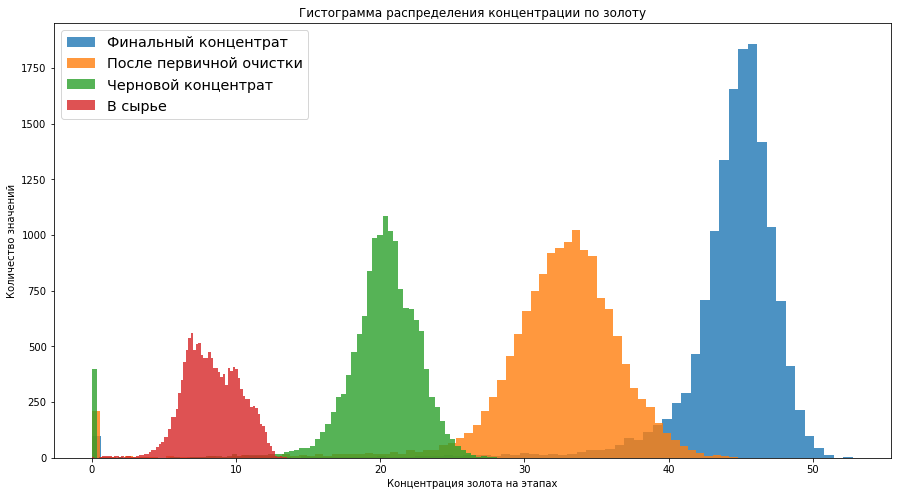

In [24]:
plt.figure(figsize=[15,8])

plt.hist(data_train['final.output.concentrate_au'], bins=80, label = 'Финальный концентрат', alpha=.8)
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=80, label = 'После первичной очистки', alpha=.8)
plt.hist(data_train['rougher.output.concentrate_au'], bins=80, label = 'Черновой концентрат', alpha=.8)
plt.hist(data_train['rougher.input.feed_au'], bins=80, label = 'В сырье', alpha=.8)

plt.xlabel("Концентрация золота на этапах")
plt.ylabel("Количество значений")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации по золоту")
plt.show()

**Концентрация золота с каждым этапом увеличивается, примерно 8% в сырье, 20% остаётся в черновом концентрате, далее 35% после первичной очистки и примерно 45% золота в финальном концентрате.**

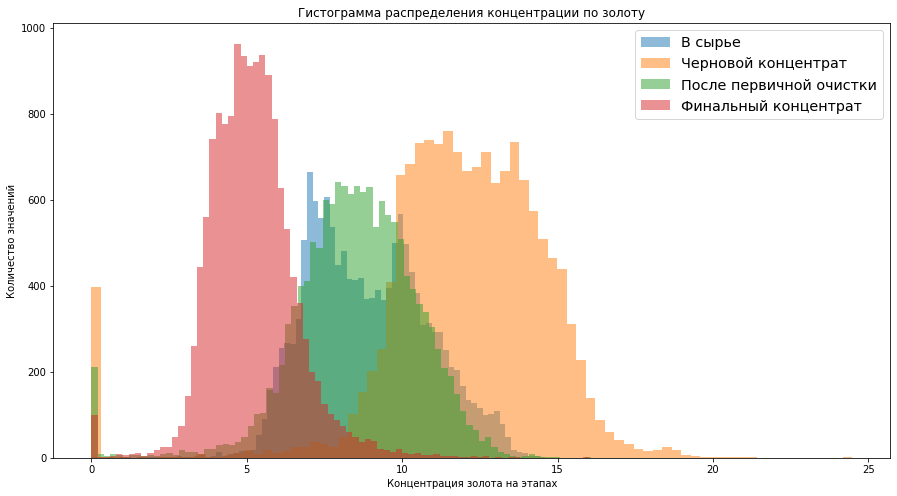

In [25]:
plt.figure(figsize=[15,8])

plt.hist(data_train['rougher.input.feed_ag'], bins=80, label = 'В сырье', alpha=.5)
plt.hist(data_train['rougher.output.concentrate_ag'], bins=80, label = 'Черновой концентрат', alpha=.5)
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=80, label = 'После первичной очистки', alpha=.5)
plt.hist(data_train['final.output.concentrate_ag'], bins=80, label = 'Финальный концентрат', alpha=.5)

plt.xlabel("Концентрация золота на этапах")
plt.ylabel("Количество значений")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Гистограмма распределения концентрации по золоту")
plt.show()

**Концентрация серебра в сырье в районе 8%, в черновом концентрате 13%, 8% после первичной очистки, и 5% в финальном концентрате.**

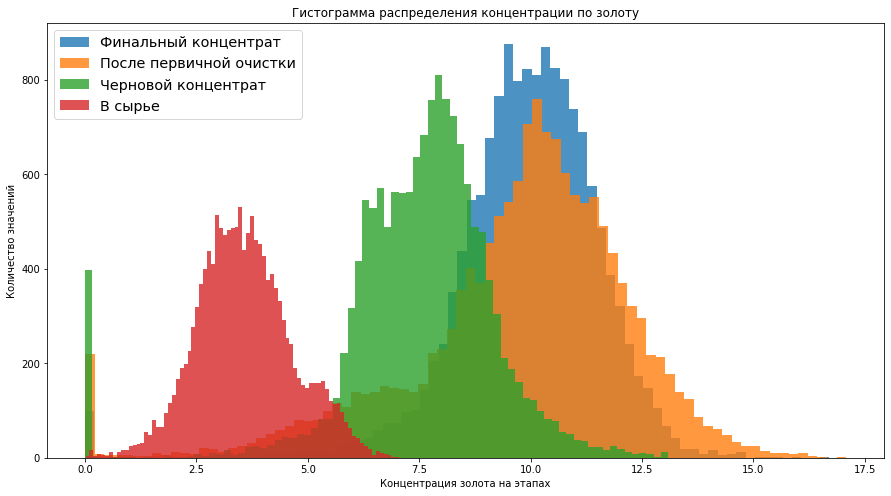

In [26]:
plt.figure(figsize=[15,8])

plt.hist(data_train['final.output.concentrate_pb'], bins=80, label = 'Финальный концентрат', alpha=.8)
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=80, label = 'После первичной очистки', alpha=.8)
plt.hist(data_train['rougher.output.concentrate_pb'], bins=80, label = 'Черновой концентрат', alpha=.8)
plt.hist(data_train['rougher.input.feed_pb'], bins=80, label = 'В сырье', alpha=.8)

plt.xlabel("Концентрация золота на этапах")
plt.ylabel("Количество значений")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации по золоту")
plt.show()

**Концентрация свинца 4% в сырье, 8% в черновом концентрате, и примерно по 12% после первичной очистки и в финальном концентрате.**

### Сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

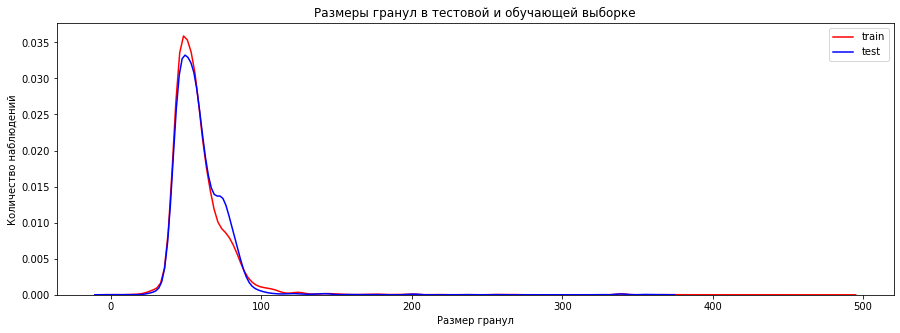

In [27]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data_train['rougher.input.feed_size'], color='r', alpha=0.5)
sns.kdeplot(data_test['rougher.input.feed_size'], color='b', alpha=0.5)
plt.legend(['train', 'test'])
plt.title('Размеры гранул в тестовой и обучающей выборке')
plt.xlabel('Размер гранул')
plt.ylabel('Количество наблюдений')
plt.show()

**Размеры гранул примерно одинаковые.**

### Суммарная концентрация металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [28]:
sum_input_conc = data_train[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 
                             'rougher.input.feed_au']].sum(axis=1)

sum_output_conc = data_train[['rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
                              'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1)

sum_primary_conc = data_train[[ 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
                               'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',]].sum(axis=1)

sum_final_conc = data_train[['final.output.concentrate_pb', 'final.output.concentrate_ag', 
                              'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)



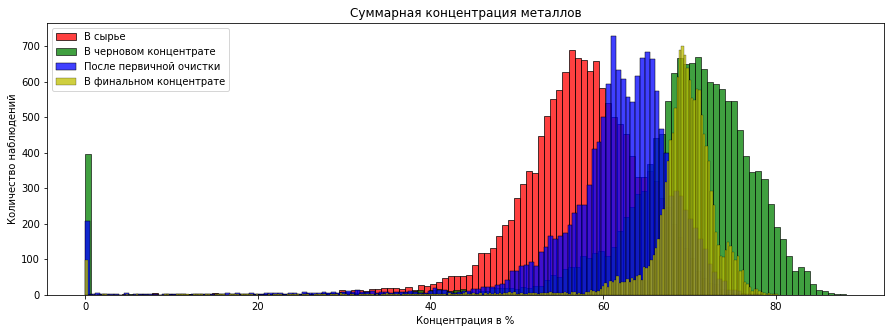

In [29]:
plt.subplots(figsize = (15, 5))
sns.histplot(sum_input_conc, color='r')
sns.histplot(sum_output_conc, color='g')
sns.histplot(sum_primary_conc, color='b')
sns.histplot(sum_final_conc, color='y')
plt.legend(['В сырье', 'В черновом концентрате', 'После первичной очистки','В финальном концентрате'])
plt.title('Суммарная концентрация металлов')
plt.xlabel('Концентрация в %')
plt.ylabel('Количество наблюдений')
plt.show()

**Суммарная концентрация в сырье в районе 55%, в черновом концентрате районе 70%, после первичной очистки 65%, в финальном концентрате 70%**

### Удаление выбросов и добавление признаков отсутствующих в тестовых данных.

In [30]:
data_target = data_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
data_test = data_test.merge(data_target, how = 'left', on = 'date')
data_train = data_train.drop('date', axis=1)
data_test.drop('date', axis=1, inplace=True)

In [31]:
out_str = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
        'final.output.concentrate_au', 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
        'final.output.concentrate_ag', 'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
        'final.output.concentrate_pb', 'rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 
        'final.output.concentrate_sol']
print(data_train.shape)
for col in out_str:
    q1 = data_train[col].quantile(0.10)
    q3 = data_train[col].quantile(0.90)
    iqr = q3-q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    data_train = data_train.loc[(data_train[col] > lower) & (data_train[col] < upper)]
print(data_train.shape)

(14579, 86)
(13452, 86)


In [32]:
print(data_full.shape)
for col in out_str:
    q1 = data_full[col].quantile(0.10)
    q3 = data_full[col].quantile(0.90)
    iqr = q3-q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    data_full = data_full.loc[(data_full[col] > lower) & (data_full[col] < upper)]
print(data_full.shape)

(19439, 87)
(18130, 87)


## Модель

### Функция sMape

In [33]:
def sMAPE(valid, prediction):
    err = np.mean(abs(valid - prediction) / ((abs(valid)+abs(prediction))/2))*100
    return err

In [34]:
def final_sMAPE(rougher, final):
    return (0.25*rougher + 0.75*final)

In [35]:
smap_score = make_scorer(sMAPE,greater_is_better=False)


### Подготовка данных для моделей.

In [36]:
data_train_features = data_train[data_test.columns]
data_train_features = data_train_features.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
data_train_rougher = data_train['rougher.output.recovery']
data_train_final = data_train['final.output.recovery']

In [37]:
data_test_features = data_test
data_test_features = data_test_features.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
data_test_rougher = data_test['rougher.output.recovery']
data_test_final = data_test['final.output.recovery']

### Масштабирование признаков.

In [38]:
scaler = StandardScaler()
scaler.fit(data_train_features)
data_train_features[data_train_features.columns] = scaler.transform(data_train_features[data_train_features.columns])
data_test_features[data_test_features.columns] = scaler.transform(data_test_features[data_test_features.columns])

### Модели

In [39]:
model_RF = RandomForestRegressor()
model_DT = DecisionTreeRegressor()

In [40]:
# Параметры для GridSearchSV, я сделал параметры поменьше иначе модели очень долго учатся.
params_RF = {'n_estimators':range(5,20,10),
             'max_depth':range(1,13,4)}
params_DT= {'max_depth':range(1,13,4)}

In [41]:
grid_rougher_RF = GridSearchCV(model_RF, param_grid = params_RF, scoring=smap_score)
grid_final_RF = GridSearchCV(model_RF, param_grid = params_RF, scoring=smap_score)
grid_rougher_DT = GridSearchCV(model_DT, param_grid = params_DT, scoring=smap_score)
grid_final_DT = GridSearchCV(model_DT, param_grid = params_DT, scoring=smap_score)

In [42]:
grid_rougher_RF.fit(data_train_features, data_train_rougher) # Обучение моделей.

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 13, 4),
                         'n_estimators': range(5, 20, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [43]:
grid_final_RF.fit(data_train_features, data_train_final)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 13, 4),
                         'n_estimators': range(5, 20, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [44]:
grid_rougher_DT.fit(data_train_features, data_train_rougher)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 13, 4)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [45]:
grid_final_DT.fit(data_train_features, data_train_final)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 13, 4)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [46]:
print('Лучшие гиперпараметры моделей')
print(grid_rougher_RF.best_estimator_)
print(grid_final_RF.best_estimator_)
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)

Лучшие гиперпараметры моделей
RandomForestRegressor(max_depth=5, n_estimators=5)
RandomForestRegressor(max_depth=1, n_estimators=5)
DecisionTreeRegressor(max_depth=5)
DecisionTreeRegressor(max_depth=1)


In [47]:
grid_score_rougher_RF = grid_rougher_RF.best_score_
grid_score_final_RF = grid_final_RF.best_score_
grid_score_rougher_DT = grid_rougher_DT.best_score_
grid_score_final_DT = grid_final_DT.best_score_

In [48]:
print('rougher score:')
print('RandomForestReggressor', grid_score_rougher_RF, 'DecisionTreeRegressor', grid_score_rougher_DT)
print('final score:')
print('RandomForestReggressor', grid_score_final_RF, 'DecisionTreeRegressor', grid_score_final_DT)

rougher score:
RandomForestReggressor -6.356111110741717 DecisionTreeRegressor -7.099384419242938
final score:
RandomForestReggressor -8.611127598086195 DecisionTreeRegressor -8.866016655498676


**Более близкие к нулю а значит лучшие значения у RandomForest**

In [49]:
final_sMAPE(grid_score_rougher_RF, grid_score_final_RF) #Финальные значения sMAPE

-8.047373476250076

### Проверка лучшей модели на тестовой выброке

In [50]:
rougher_test = grid_rougher_RF.predict(data_test_features)

In [51]:
final_test = grid_final_RF.predict(data_test_features)

In [52]:
final_sMAPE(sMAPE(data_test_rougher, rougher_test),sMAPE(data_test_final, final_test))

7.60377219476092

**Финальная ошибка 7.5% что является хорошим результатом.**

**Оценка качества в сравнении с константной моделью.**

In [53]:
dummy_rougher = DummyRegressor(strategy='median')
dummy_final = DummyRegressor(strategy='median')

In [54]:
dummy_rougher.fit(data_train_features, data_train_rougher)
dummy_final.fit(data_train_features, data_train_final)

DummyRegressor(strategy='median')

In [55]:
rougher_predict = dummy_rougher.predict(data_test)
final_predict = dummy_final.predict(data_test)

In [56]:
final_sMAPE(sMAPE(data_test_rougher, rougher_predict), sMAPE(data_test_final, final_predict))

8.294999957934778

**Значение dummy хуже, думаю если модели обучать подольше то разница будет прилично больше.**

### Вывод:

* **Написана функция рассчёта sMAPE**
* **Поиск гиперпараметров проведён с помощью GridSearchSV**
* **Обучено две модели DecisionTreeReggressor и RandomForestReggressor**
* **RandomForestReggressor показал лучшую метрику, проверка модели на тестовой выборке показала метрику в 7.5.**